In [3]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import scipy
import sklearn
import re
from datetime import datetime,date,timedelta
from collections import Counter
import copy
import random
import matplotlib.pyplot as plt
%matplotlib inline

# COLOR_GENERATOR

In [4]:
symbols = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
def color_generator():
    color = '#'
    for i in range(6):
        index = 0
        for j in range(1000) :
            index = random.randint(0, 15)
        color += (symbols[index])
    return color

## Data format!
generation \t name \t gender \t birthday \t deathdate \t parents
\t siblings \t spouses \t children

Эти данные означают номер поколения, фамилию, пол, дату рождения, дату смерти, родителей, братьев и сестер, супруг, детей соответственно.

In [5]:
from tqdm import tqdm

In [6]:
from BranchingProcess import Person, BranchingProcess, read_from_files

In [7]:
%%time
data_origin = read_from_files(["E.txt", 'U.txt', 'N.txt', 'K.txt', 'S.txt', 'M.txt', 'C.txt', 'R.txt', 'F.txt', 'O.txt']) #считываем данные при помощи готового скрипта

CPU times: user 6.04 s, sys: 406 ms, total: 6.45 s
Wall time: 6.81 s


In [8]:
%%time
data = copy.deepcopy(data_origin)

CPU times: user 22.6 s, sys: 726 ms, total: 23.3 s
Wall time: 23.7 s


In [9]:
print('Количество родословных равно:', len(data))

Количество родословных равно: 89279


В имеющихся данных очень много людей, про которых известно лишь то, что они когда-то существовали. Обычно их фамилия неизвестна (вместо фамилии у них может стоять, к примеру, B-290), а у некоторых из них неизвестен даже пол, не говоря уже о родителях и детях. Такие данные стоит удалить.
Удалите все процессы, состоящие только из одного поколения (в котором, есте- ственно, будет только один человек). Сколько осталось процессов?

а у некоторых из них неизвестен даже пол, не говоря уже о родителях и детях. Такие данные стоит удалить.

In [10]:
print(data[1].generations[2])

[<BranchingProcess.Person object at 0x12de8f630>, <BranchingProcess.Person object at 0x12de8f5f8>, <BranchingProcess.Person object at 0x115105048>]


In [11]:
print(data[1])

0:
Kingdon-3	male	1666--	1700--			Lyne-1	Kingdon-5
1:
Kingdon-5	male	1689--	1768-Apr-	Kingdon-3;Lyne-1		Glandfield-1	Kingdome-1;E-41;Kingdon-4
2:
Kingdome-1	female			Kingdon-5;Glandfield-1	E-41;Kingdon-4		
E-41	female	1728--		Kingdon-5;Glandfield-1	Kingdome-1;Kingdon-4	Sibly-11	
Kingdon-4	male	1735-Oct-17	1785-Mar-19	Kingdon-5;Glandfield-1	Kingdome-1;E-41		



In [12]:
type(data[0])

BranchingProcess.BranchingProcess

In [13]:
print(data[0].generations[0][0])

E-483	female	1860--	1940--			Lang-2666	Lang-2667


In [14]:
big_predicate = lambda person: (bool(re.match('[A-Z]-\d+', person.name)) 
                                                                   or bool(re.search('UNKNOWN', person.name)) 
                                                                   or person.gender == 'unknown')

In [15]:
big_pred_child = lambda person: big_predicate(person) or (len(person.parents) == 0)

Эти предикаты нужны, чтобы отсекать персон с неизвестной фамилией, полом, и без родителей

In [16]:
print (data[0].generations[0][0])

E-483	female	1860--	1940--			Lang-2666	Lang-2667


In [17]:
big_predicate(data[0].generations[0][0])

True

Данная ячейка находит для каждого рода номера поколений и персон, которые подлежать к удалению из списка(заодно удаляя людей из 0 поколения, ибо к его родителю мы никак не придем!)

In [18]:
delete_from_all = []
for branch in tqdm(data):
    to_delete = []   
    for index, generation in (enumerate(branch.generations)):
        if index == 0:
            for p_ind, pers in enumerate(generation):
                if big_predicate(pers):
                    del generation[p_ind]
        else:
            for p_ind1, persona in enumerate(generation):
                if big_pred_child(persona):
                    to_delete.append((index, p_ind1))
    delete_from_all.append(to_delete)
#         else:
#             for person in branch.generations[index]:
#                 prev_ind = index - 1
#                 for prev_pers in branch.generations[prev_ind]:
#                     if prev_pers.gender == 'male' and person.name in prev_pers.children:
#                         if len(person.parents) == 0 or person.parents[0] == prev_pers.name:
#                             prev_pers.children.remove(person.name)                    

100%|██████████| 89279/89279 [00:01<00:00, 56225.18it/s]


In [19]:
gen_lengths = []
for branch in data:
    gen_lengths.append(len(branch.generations))

In [20]:
max_gen_len = np.max(gen_lengths)

In [21]:
print(data[158])

0:
Ellison-600	male	1800--				Basnett-25	Ellison-599;E-290;E-291;E-292;E-293;E-294;E-289
1:
Ellison-599	female	1852--		Ellison-600;Basnett-25	E-290;E-291;E-289;E-292;E-293;E-294	Charnock-32	Charnock-36;Charnock-37;Charnock-31;Charnock-38
E-290	unknown	1880--		Ellison-600;Basnett-25	Ellison-599;E-291;E-289;E-292;E-293;E-294		
E-291	unknown	1880--		Ellison-600;Basnett-25	Ellison-599;E-290;E-289;E-292;E-293;E-294		
E-292	female	1890--		Ellison-600;Basnett-25	Ellison-599;E-290;E-291;E-289;E-293;E-294		
E-293	female	1890--		Ellison-600;Basnett-25	Ellison-599;E-290;E-291;E-289;E-292;E-294		
E-294	female	1890--		Ellison-600;Basnett-25	Ellison-599;E-290;E-291;E-289;E-292;E-293		
E-289	female	1890--		Ellison-600;Basnett-25	Ellison-599;E-290;E-291;E-292;E-293;E-294		



In [22]:
delete_from_all[158]

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)]

Итак, мы знаем индексы тех людей, которые подлежат удалению

In [23]:
delete_from_all[:10]

[[], [(2, 1)], [], [], [(1, 0)], [], [], [], [], []]

In [24]:
print(data[158].generations[1][6])

E-289	female	1890--		Ellison-600;Basnett-25	Ellison-599;E-290;E-291;E-292;E-293;E-294		


In [25]:
delete_from_all[158]

[(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)]

In [26]:
print(data[1])

0:
Kingdon-3	male	1666--	1700--			Lyne-1	Kingdon-5
1:
Kingdon-5	male	1689--	1768-Apr-	Kingdon-3;Lyne-1		Glandfield-1	Kingdome-1;E-41;Kingdon-4
2:
Kingdome-1	female			Kingdon-5;Glandfield-1	E-41;Kingdon-4		
E-41	female	1728--		Kingdon-5;Glandfield-1	Kingdome-1;Kingdon-4	Sibly-11	
Kingdon-4	male	1735-Oct-17	1785-Mar-19	Kingdon-5;Glandfield-1	Kingdome-1;E-41		



In [27]:
print(data[1].generations[2][0].siblings)

['E-41', 'Kingdon-4']


Этот код заглядывает в предыдущее поколение и ищет отца персоны, которую мы удалим далее. У этого отца удалим персону из детей

In [28]:
for b_ind, branch in tqdm(enumerate(delete_from_all)):
    for pers_to_del in branch:
        person = data[b_ind].generations[pers_to_del[0]][pers_to_del[1]] #chel
        prev_gen = data[b_ind].generations[pers_to_del[0] - 1]
        for par_ind, par in enumerate(prev_gen):
            if person.name in par.children:
                par.children.remove(person.name)
            prev_gen[par_ind].children = par.children

89279it [00:00, 352410.48it/s]


Здесь идет удаление всех людей, которые не удовлетворяют условию нашей заачи

In [32]:
for index, branch in tqdm(enumerate(delete_from_all)):
    gen_del = [[] for i in range(len(data[index].generations))]
    for pers in branch:
        gen_del[pers[0]].append(pers[1])
    for i in range(len(gen_del)):
        data[index].generations[i] = [data[index].generations[i][el_ind] for el_ind, element in enumerate(data[index].generations[i]) if el_ind not in gen_del[i]]

89279it [00:00, 154379.71it/s]


In [34]:
# for branch in tqdm(data):
#     for index, generation in enumerate(branch.generations):
#         for p_ind, person in enumerate(generation):
#             person.parents = list(filter(predicat,person.parents))
#             person.siblings = list(filter(predicat,person.siblings))
#             person.spouses = list(filter(predicat,person.spouses))
#             person.children = list(filter(predicat,person.children))

In [35]:
def printer(given_data = data):
    for branch in given_data:
        for b_index, generation in enumerate(branch.generations):
            for index, person in enumerate(generation):
                print (index, person.birthday)

Удалите все процессы, состоящие только из одного поколения (в котором, есте- ственно, будет только один человек). Сколько осталось процессов?

In [36]:
len(data)

89279

In [37]:
data = list(filter(lambda branch: len(branch.generations) > 1, data))

In [38]:
len(data)

25413

После такой очистки количество родов уменьшилось более чем в 3 раза!

## Konec Pervogo Punkta

посчитаeM следующие характеристики: минимальное, максимальное и среднее число поколений в роду, год рождения самого старого и самого молодого человека, среднюю продолжительность жизни.

In [39]:
print(list(map(int,'12-32-45'.split('-'))))

[12, 32, 45]


Декодируем три буквы месяца в его номер. Это нужно для того, чтобы представить его далее объектом типа datetime. Ведь нам нужно посчитать продолжительности жизни

In [40]:
mon_to_num = {
    "Jan":1,
    "Feb":2,
    "Mar":3,
    "Apr":4,
    "May":5,
    "Jun":6,
    "Jul":7,
    "Aug":8,
    "Sep":9,
    "Oct":10,
    "Nov":11,
    "Dec":12
}

In [41]:
mon_to_num['Oct']

10

In [42]:
'1--'.split('-')

['1', '', '']

In [43]:
data_copy = copy.deepcopy(data)

In [44]:
for branch in tqdm(data_copy):
    for g_index, generation in enumerate(branch.generations):
        branch.generations[g_index] = list(filter(lambda person: not(person.birthday == [''] or person.birthday == '' or person.deathdate == [''] or person.deathdate == ''), generation))

for branch in data_copy:
        for br_ind, generation in enumerate(branch.generations):
            for ind, person in enumerate(generation):
                person.birthday = person.birthday.split('-')
                if person.birthday[1] == '':
                    person.birthday[1] = 'Jun'
                if person.birthday[2] == '':
                    person.birthday[2] = '15'
                person.birthday[1] = mon_to_num[person.birthday[1]]
                person.birthday = list(map(int, person.birthday))
               
                person.deathdate = person.deathdate.split('-')
                if person.deathdate[1] == '':
                    person.deathdate[1] = 'Jun'
                if person.deathdate[2] == '':
                    person.deathdate[2] = '15'
                person.deathdate[1] = mon_to_num[person.deathdate[1]]
                person.deathdate = list(map(int, person.deathdate))

100%|██████████| 25413/25413 [00:02<00:00, 10559.14it/s]


In [45]:
print(data_copy[0].generations[1][0].birthday)

[1689, 6, 15]


Тут мы посчитаем все нужные нам статистики. Продолжительность жизни будем считать в днях) так удобнее

In [46]:
def calc_all():
    generations_lenghts = [len(branch.generations) for branch in data_copy]
    person_bd = []
    person_lifetime = []
    for branch in data_copy:
        for br_ind, generation in enumerate(branch.generations):
            for ind, person in enumerate(generation):
                person_bd.append((person.birthday, person.deathdate))
                birth = date(person.birthday[0], person.birthday[1], person.birthday[2])
                death = date(person.deathdate[0], person.deathdate[1], person.deathdate[2])
                person_lifetime.append((death - birth).days)
                
                
    minimum = (np.min(generations_lenghts), np.argmin(generations_lenghts))
    maximum = (np.max(generations_lenghts), np.argmax(generations_lenghts))
    mean = np.mean(generations_lenghts)
    return {'minimum':minimum, 'maximum':maximum, 'mean':mean}, person_bd, person_lifetime, generations_lenghts

In [47]:
calc_results, bir_death, lifetime, gen_lengths = calc_all()

In [48]:
calc_results

{'maximum': (81, 17841), 'mean': 3.2939833943257386, 'minimum': (2, 1)}

In [49]:
bir_death

[([1666, 6, 15], [1700, 6, 15]),
 ([1689, 6, 15], [1768, 4, 15]),
 ([1735, 10, 17], [1785, 3, 19]),
 ([1876, 6, 9], [1940, 1, 4]),
 ([1725, 6, 15], [1784, 3, 21]),
 ([1754, 5, 6], [1842, 5, 7]),
 ([1790, 9, 16], [1872, 8, 27]),
 ([1825, 6, 15], [1911, 6, 15]),
 ([1827, 1, 31], [1903, 7, 29]),
 ([1828, 11, 27], [1905, 5, 2]),
 ([1834, 8, 15], [1898, 11, 10]),
 ([1856, 6, 15], [1928, 6, 15]),
 ([1858, 6, 15], [1905, 6, 15]),
 ([1864, 6, 15], [1941, 6, 15]),
 ([1857, 6, 15], [1912, 7, 18]),
 ([1859, 7, 15], [1914, 6, 15]),
 ([1863, 3, 1], [1950, 6, 15]),
 ([1864, 6, 15], [1895, 6, 15]),
 ([1877, 6, 15], [1945, 6, 15]),
 ([1892, 1, 23], [1982, 11, 15]),
 ([1890, 6, 15], [1910, 6, 15]),
 ([1884, 11, 15], [1969, 11, 27]),
 ([1886, 2, 2], [1959, 6, 15]),
 ([1886, 6, 4], [1916, 6, 15]),
 ([1915, 4, 15], [1919, 11, 4]),
 ([1918, 12, 4], [1993, 6, 28]),
 ([1912, 6, 15], [1991, 6, 26]),
 ([1914, 2, 6], [1996, 2, 6]),
 ([1916, 8, 16], [1997, 3, 5]),
 ([1917, 12, 2], [1996, 2, 6]),
 ([1924, 6, 15],

In [50]:
lifetime

[12418,
 28793,
 18051,
 23218,
 21464,
 32142,
 29930,
 31410,
 27937,
 27914,
 23463,
 26297,
 17166,
 28123,
 20121,
 20058,
 31882,
 11322,
 24836,
 33168,
 7304,
 31057,
 26795,
 10968,
 1664,
 27235,
 28865,
 29950,
 29421,
 28555,
 26168,
 25014,
 19723,
 29311,
 27529,
 23984,
 15706,
 13697,
 32945,
 16859,
 12535,
 25634,
 14737,
 20762,
 18988,
 27725,
 27445,
 31888,
 34032,
 29949,
 34015,
 29044,
 33703,
 29862,
 25743,
 28683,
 20753,
 16679,
 1460,
 22300,
 33965,
 23955,
 32866,
 35104,
 25701,
 14354,
 21191,
 28745,
 23215,
 21117,
 20534,
 26278,
 24231,
 12302,
 20856,
 18263,
 33253,
 18268,
 7362,
 22472,
 12270,
 27358,
 14847,
 13209,
 27276,
 21630,
 11461,
 23740,
 24594,
 33006,
 11,
 26176,
 25475,
 14730,
 17013,
 31622,
 10094,
 1588,
 17948,
 30709,
 32362,
 15340,
 29449,
 17183,
 370,
 25188,
 26059,
 25879,
 15603,
 20243,
 14566,
 37130,
 24241,
 34679,
 27861,
 13027,
 25280,
 22597,
 22662,
 25827,
 19941,
 19655,
 4602,
 29684,
 23518,
 22004,
 21

In [51]:
lifetime = list(map(abs, lifetime))

In [52]:
lifetime_mean = np.mean(lifetime)
print(lifetime_mean / 365., ' лет' )

58.679509128  лет


In [53]:
np.min(lifetime)

0

In [54]:
bir_death[np.argmin(lifetime)]

([1753, 4, 3], [1753, 4, 3])

In [55]:
np.max(lifetime) / 365.

1781.1808219178083

In [56]:
bir_death[np.argmax(lifetime)]

([1979, 3, 24], [199, 3, 24])

Все статистики посчитаны! Супер!)

Взглянем на частоты длин поколений и построим гистограмму

In [57]:
Counter(gen_lengths)

Counter({2: 14162,
         3: 5232,
         4: 2418,
         5: 1162,
         6: 753,
         7: 445,
         8: 282,
         9: 252,
         10: 166,
         11: 85,
         12: 75,
         13: 51,
         14: 79,
         15: 44,
         16: 5,
         17: 17,
         18: 11,
         19: 11,
         20: 5,
         21: 11,
         22: 3,
         23: 32,
         24: 1,
         25: 10,
         26: 3,
         27: 1,
         28: 6,
         30: 6,
         31: 3,
         32: 1,
         33: 4,
         34: 33,
         35: 1,
         37: 3,
         38: 3,
         39: 2,
         40: 1,
         41: 1,
         44: 1,
         45: 2,
         46: 3,
         47: 1,
         48: 5,
         49: 3,
         51: 4,
         53: 12,
         66: 1,
         81: 1})

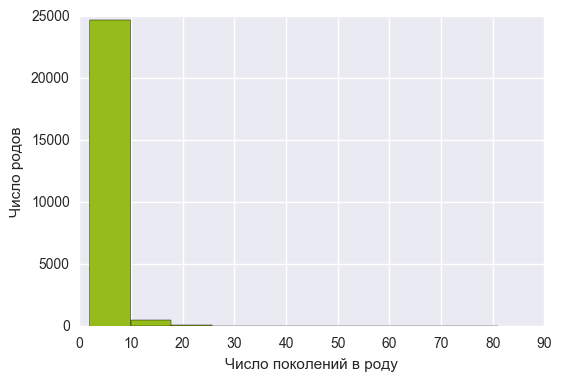

In [207]:
plt.hist(gen_lengths, color=color_generator())
plt.xlabel('Число поколений в роду')
plt.ylabel('Число родов')
plt.show()

В качестве базового варианта рекомендуется приближать неизвестный закон размножения пуассоновским распределением и дискретным распределением в общем виде (лучше — оба варианта) на основе оценки максимального правдоподобия (в качестве критерия проверки близости теоретического и эмпирического законов распределения можно использовать критерий хи-квадрат). Гарантируется, что отец указан у всех людей, кроме тех, кто принадлежит нулевому поколению, причем отец стоит первым из родителей

Для всех поколений, кроме последнего. Для каждого мужчины мы считаем кол-во детей-мальчиков. Это можно сделать придя в следующее поколение и посмотреть там пол ребенка.

In [59]:
children_num = []
for branch in tqdm(data):
        for br_ind, generation in enumerate(branch.generations):
            if br_ind == len(branch.generations) - 1:
                continue
            for ind, person in enumerate(generation):
                if person.gender == 'female':
                    continue
                next_gen = branch.generations[br_ind + 1]
                childrens = 0
                for child in person.children:
                    for pip in next_gen:
                        if child == pip.name and pip.gender != 'female':
                            childrens += 1
                children_num.append(childrens)

100%|██████████| 25413/25413 [00:05<00:00, 5019.13it/s]


Строим гистограмму числа детей

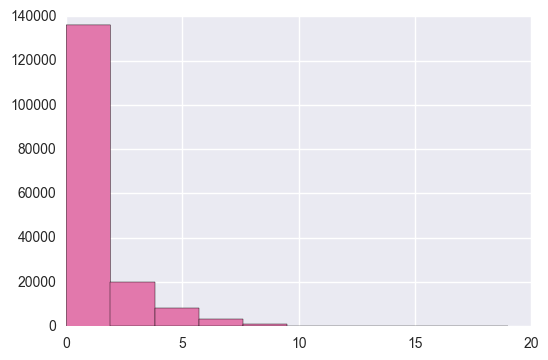

In [208]:
plt.hist(children_num, color=color_generator())
plt.show()

In [61]:
children_freqs =  Counter(children_num)
children_freqs

Counter({0: 96340,
         1: 39758,
         2: 12847,
         3: 7339,
         4: 4897,
         5: 3347,
         6: 2032,
         7: 1157,
         8: 587,
         9: 319,
         10: 179,
         11: 82,
         12: 32,
         13: 32,
         14: 11,
         15: 4,
         16: 5,
         17: 4,
         18: 3,
         19: 3})

Теперь можно воспользоваться критерием $\chi^2 $

In [62]:
lambda_cup = np.mean(children_num)
lambda_cup

0.9209186994756714

In [63]:
import scipy.stats as sps

In [64]:
hyp_probs = [sps.poisson.pmf(k, lambda_cup) for k in children_freqs]

In [65]:
dlina = len(children_num)
dlina

168978

In [66]:
hyp_probs

[0.39815308997570947,
 0.36666662581265036,
 0.16883507609225931,
 0.051827792900253154,
 0.01193229590859889,
 0.0021977348859811533,
 0.0003373225254983461,
 4.4378088783683707e-05,
 5.1085764759857397e-06,
 5.227315116040887e-07,
 4.813932238413884e-08,
 4.0302183785128426e-09,
 3.092919556452502e-10,
 2.1910211196239292e-11,
 1.4412516571484212e-12,
 8.8485040114551937e-14,
 5.0929705040841249e-15,
 2.7589481018171125e-16,
 1.4115371654701628e-17,
 6.8416366878229228e-19]

In [67]:
(children_freqs.values())

dict_values([96340, 39758, 12847, 7339, 4897, 3347, 2032, 1157, 587, 319, 179, 82, 32, 32, 11, 4, 5, 4, 3, 3])

In [68]:
np.array(hyp_probs) * dlina

array([  6.72791128e+04,   6.19585931e+04,   2.85294135e+04,
         8.75775679e+03,   2.01629550e+03,   3.71368846e+02,
         5.70000857e+01,   7.49892069e+00,   8.63237036e-01,
         8.83301254e-02,   8.13448642e-03,   6.81018241e-04,
         5.22635361e-05,   3.70234367e-06,   2.43539823e-07,
         1.49520251e-08,   8.60599970e-10,   4.66201532e-11,
         2.38518727e-12,   1.15608608e-13])

In [75]:
sps.chisquare(list(children_freqs.values()), np.array(hyp_probs) * dlina) # ne ochen' priyatnoe znacheniye :'(

Power_divergenceResult(statistic=81996290189324.281, pvalue=0.0)

In [93]:
%%html
<p>Все очень плохо</p>
<img src='https://openclipart.org/image/2400px/svg_to_png/222252/feels.png' style="width:228px;height:228px;">

Это было для пункта (а)

In [70]:
np.max(children_num)

19

In [71]:
dots = np.arange(0,20, 1)

In [72]:
dots

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [202]:
def ecdf(dot):
    return (1. / len(children_num)) * np.sum([elem <= dot for elem in children_num])

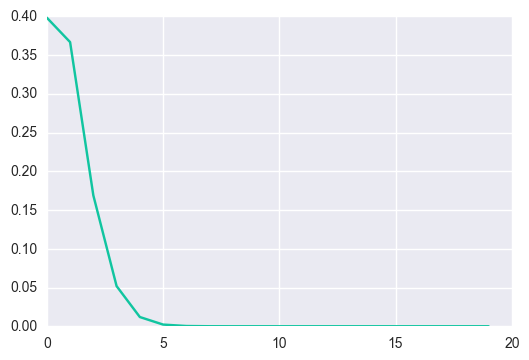

In [73]:
plt.plot(dots, [sps.poisson.pmf(dot, lambda_cup) for dot in dots], color=color_generator())
plt.show()

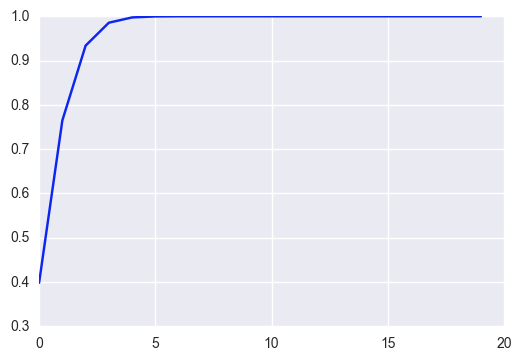

In [204]:
plt.plot(dots, [sps.poisson.cdf(dot, lambda_cup) for dot in dots], color=color_generator())
plt.show()

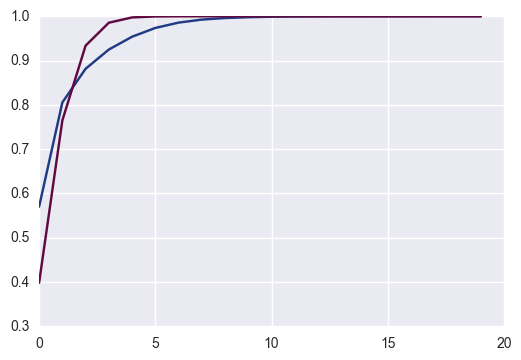

In [205]:
plt.plot(dots, [ecdf(dot) for dot in dots], color=color_generator())
plt.plot(dots, [sps.poisson.cdf(dot, lambda_cup) for dot in dots], color=color_generator())
plt.show()

Теперь посчитаем для пункта (б)

In [74]:
children_num_b = []
for branch in tqdm(data):
    children_num_for_branch = []
    for br_ind, generation in enumerate(branch.generations):
        if br_ind == len(branch.generations) - 1:
            continue
        for ind, person in enumerate(generation):
            if person.gender == 'female':
                continue
            next_gen = branch.generations[br_ind + 1]
            childrens = 0
            for child in person.children:
                for pip in next_gen:
                    if child == pip.name and pip.gender != 'female':
                        childrens += 1
            children_num_for_branch.append(childrens)
    children_num_b.append(children_num_for_branch)

100%|██████████| 25413/25413 [00:04<00:00, 5576.03it/s]


In [271]:
len(data)

25413

In [82]:
lambdas = {}
for s_ind, sample in tqdm(enumerate(children_num_b)):
    if len(sample) >= 5:
        lambdas[s_ind] = np.mean(sample)

25413it [00:00, 132890.30it/s]


In [83]:
len(lambdas)

4967

In [88]:
list(lambdas.values())[:20]

[1.0,
 1.2380952380952381,
 0.88888888888888884,
 1.25,
 1.0,
 1.2857142857142858,
 0.91666666666666663,
 1.0,
 1.0192307692307692,
 1.0,
 1.0,
 1.1000000000000001,
 1.0909090909090908,
 1.0,
 0.96296296296296291,
 0.99411764705882355,
 1.1111111111111112,
 1.0,
 1.1666666666666667,
 0.94736842105263153]

100%|██████████| 20/20 [00:00<00:00, 54.67it/s]


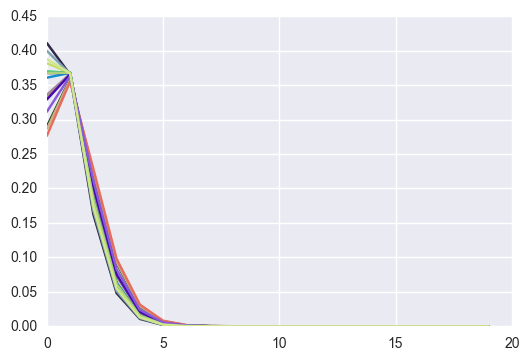

In [89]:
for lambdka in tqdm(list(lambdas.values())[:20]):
    plt.plot(dots, [sps.poisson.pmf(dot, lambdka) for dot in dots], color=color_generator())

In [654]:
np.mean(list(lambdas.values()))

0.97576343540558985

mb Chi_squared_Test here???


In [90]:
days_b = []
for branch in data:
    for gen in branch.generations:
        for per in gen:
            days_b.append(per.birthday)

# 4 PUNKT

In [94]:
my_distr = sps.poisson(lambda_cup)

In [151]:
my_distr.rvs(100)

array([0, 1, 0, 0, 0, 0, 0, 2, 0, 5, 0, 1, 0, 0, 2, 2, 1, 0, 0, 0, 2, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 2, 1, 4, 0, 4, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 2, 4, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 2,
       1, 1, 1, 1, 1, 4, 3, 3, 0, 2, 1, 1, 3, 3, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       2, 0, 1, 0, 1, 1, 0, 0])

In [186]:
n = 100

In [201]:
lambda_cup

0.9209186994756714

In [200]:
gens = []
x = 0

add_to_gen = []
while x < n:
    value = my_distr.rvs(1)[0]
    if value == 0:
        add_to_gen.append(value)
    else:
        x += value
        add_to_gen.append(value)
gen_len =  len(add_to_gen)
gens.append(add_to_gen)
while gen_len > 5:
    y = 0
    add_to_gen = []
    while y < gen_len:
        val = my_distr.rvs(1)[0]
        if val == 0:
            add_to_gen.append(val)
        else:
            y += value
            add_to_gen.append(value)
    gen_len = len(add_to_gen)
    gens.append(add_to_gen)
for gen in gens:
    print(gen, "\n")

[1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 1, 2, 1, 1, 1, 0, 0, 0, 2, 1, 1, 3, 1, 0, 1, 0, 2, 2, 0, 1, 0, 2, 0, 3, 0, 0, 0, 1, 1, 0, 2, 0, 1, 1, 2, 0, 1, 0, 0, 2, 2, 1, 1, 2, 1, 3, 2, 0, 0, 0, 0, 1, 0, 3, 0, 2, 0, 1, 0, 4, 1, 0, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 4, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2] 

[2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2] 

[2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2] 

[2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 

Понятно, что процесс не сходится, т.к. у Пуассоновского распределения $E\xi = \lambda$, где $\xi \sim Pois(\lambda)$
А мы знаем теорему о вероятности вырождения ветвлящегося процесса. Она гласит, если $E\xi < 1$, то процесс вырождается с вероятностью 1 


Теорема (о вероятности вырождения). Пусть $μ = E\xi$. Если $μ \leq 1$, то уравнение $q = \phi_\xi(q)$ имеет единственный корень q = 1. Если же $μ \geq 1$ , то тогда $\exists!$ корень на полуинтервале [0, 1) , который и есть вероятность вырождения (при условии, что $P(\xi = 1) < 1$ ).


# A TEIIEPb IIPuCTYIIuM K IIYHKTY HOMEP 5

Найдем кол-во мужчин в последних поколениях всех родов, для того чтобы узнать, со скольки человек мы продолжаем род

In [255]:
print(data_copy[1].generations[0][0].birthday)

[1876, 6, 9]


In [256]:
last_gen_males_num = 0
for branch in tqdm(data_copy):
    last_gen_males_num += len([elem for elem in branch.generations[-1] if elem.gender == 'male' and elem.birthday[0] >= 1950])
last_gen_males_num

100%|██████████| 25413/25413 [00:02<00:00, 11898.78it/s]


169

Возбмем в рассмотрение тех мужчин, которые родились после 1950года! Теперь для каждого из этих мужчин узнаем, сколько детей у него будет(просто сгенерив наблюдение размера 1 из пуассоновского распределения)

In [257]:
N = [100, 200, 300]


In [261]:
100 / 25

4.0

In [262]:
generations = []
for n in tqdm(N):
    last_gen = [1] * last_gen_males_num
    this_gen = [last_gen]
    for j in range(int(n / 25)):
        new_gen = my_distr.rvs(np.sum(last_gen))
        this_gen.append(new_gen)
        last_gen = new_gen
    generations.append(this_gen)

100%|██████████| 3/3 [00:00<00:00, 77.31it/s]


In [266]:
for elem in generations[0]:
    print(elem)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[2 1 4 1 0 2 1 0 0 0 1 1 2 2 0 0 1 1 0 1 1 0 1 2 0 1 0 0 0 1 2 1 3 0 0 1 0
 3 2 1 1 1 1 3 0 1 4 0 2 3 0 1 1 0 2 2 2 1 0 1 2 0 2 0 0 1 2 1 0 1 0 1 0 1
 2 2 0 0 0 1 1 0 0 1 0 0 0 2 1 0 2 0 2 0 1 1 0 2 0 0 0 1 0 1 2 1 1 1 3 2 3
 0 2 0 0 1 1 2 1 1 0 1 2 0 1 2 0 2 2 0 1 1 2 1 2 2 0 2 1 0 1 0 0 0 0 1 0 0
 1 1 0 1 0 1 3 0 2 0 1 0 1 0 1 0 0 0 1 2 0]
[0 2 4 0 0 2 0 0 0 0 0 0 2 0 0 1 2 1 2 1 1 4 2 0 0 1 1 2 1 1 2 0 1 3 2 0 4
 2 0 0 0 4 0 0 1 2 1 1 0 2 0 0 1 1 4 0 2 2 0 2 1 0 0 1 1 1 1 0 1 2 0 0 1 

In [268]:
mens, surnames = [], []
for gen_inf in generations:
    mens.append(np.sum(gen_inf[-1]))
    surnames.append(len(gen_inf[-1]))

In [269]:
mens

[156, 95, 88]

In [270]:
surnames

[162, 100, 80]

Видна тенденция вырождения! Но этого и стоило ожидать, ведь $\lambda = E\xi < 1. р = 1$

# Теперь проведем такой же анализ для процессов в -отдельности

In [ ]:
last_gen_males_num = 0
for branch in tqdm(data_copy):
    last_gen_males_num += len([elem for elem in branch.generations[-1] if elem.gender == 'male' and elem.birthday[0] >= 1950])
last_gen_males_num

In [280]:
last_gen_for_lambdas = []
for index in lambdas:
    last_gen_for_lambdas.append(len([elem for elem in data_copy[index].generations[-1] if elem.gender == 'male']))
last_gen_for_lambdas

[1,
 6,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 13,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 2,
 2,
 0,
 1,
 0,
 1,
 0,
 1,
 6,
 0,
 0,
 2,
 1,
 0,
 2,
 0,
 2,
 1,
 0,
 0,
 11,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 3,
 1,
 0,
 1,
 0,
 5,
 1,
 16,
 1,
 0,
 1,
 0,
 0,
 0,
 5,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5,
 0,
 0,
 0,
 0,
 3,
 0,
 1,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 2,
 1,
 0,
 6,
 0,
 0,
 4,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 6,
 3,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 3,
 0,
 1,
 0,
 0,
 7,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 1,
 3,
 2,
 0,
 

In [287]:
[1] * last_gen_for_lambdas[1]

[1, 1, 1, 1, 1, 1]

In [289]:
len(lambdas)

4967

In [288]:
gens_for_lambda = []
for b_ind, (index, lambdka) in tqdm(enumerate(zip(lambdas, lambdas.values()))):
    generations = []
    this_distr = sps.poisson(lambdka)
    for n in (N):
        last_gen = [1] * last_gen_for_lambdas[b_ind]
        this_gen = [last_gen]
        for j in range(int(n / 25)):
            new_gen = this_distr.rvs(np.sum(last_gen))
            this_gen.append(new_gen)
            last_gen = new_gen
        generations.append(this_gen)
    gens_for_lambda.append(generations)

0it [00:00, ?it/s]/usr/local/lib/python3.5/site-packages/scipy/stats/_discrete_distns.py:454: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return self._random_state.poisson(mu, self._size)
4967it [00:18, 261.93it/s]


In [295]:
gens_for_lambda[0]

[[[1], array([3]), array([2, 1, 0]), array([2, 1, 1]), array([0, 0, 2, 0])],
 [[1],
  array([0]),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64)],
 [[1],
  array([3]),
  array([0, 1, 1]),
  array([0, 0]),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64),
  array([], dtype=int64)]]

In [297]:
mens_lambda, surnames_lambda = [], []
for gen in tqdm(gens_for_lambda):
    men, sur = [],[]
    for gen_inf in gen:
        men.append(np.sum(gen_inf[-1]))
        sur.append(len(gen_inf[-1]))
    mens_lambda.append(men)
    surnames_lambda.append(sur)

100%|██████████| 4967/4967 [00:00<00:00, 36285.13it/s]


In [298]:
for elem in zip(mens_lambda[:20], surnames_lambda[:20]):
    print (elem[0], elem[1])

[2, 0, 0] [4, 0, 0]
[2, 21, 152] [3, 14, 116]
[0, 0, 0] [0, 0, 0]
[0, 0, 0] [0, 0, 0]
[0, 0, 0] [0, 0, 0]
[0, 0, 0] [0, 0, 0]
[0, 0, 0] [0, 0, 0]
[0, 0, 0] [0, 0, 0]
[1, 0, 0] [2, 0, 0]
[0, 0, 0] [0, 0, 0]
[0, 0, 0] [0, 0, 0]
[0, 0, 0] [0, 0, 0]
[0, 31, 0] [0, 26, 0]
[0, 0, 0] [0, 0, 0]
[0, 0, 0] [0, 0, 0]
[0, 0, 0] [0, 0, 0]
[0, 0, 0] [0, 0, 0]
[0, 0, 0] [0, 0, 0]
[0, 0, 0] [0, 0, 0]
[0, 0, 0] [0, 0, 0]


Результаты Ужасающие!!! Наши поколения вымирают. А это очень плоъхо!

А ТЕПЕРЬ ПУНКТ 6

Для пункта 3(а) ясно, что вероятность выородения равна 1 из теоремы о вырождении, а для пункта(б) сейчас ее найдем

In [210]:
lambdas

{16384: 1.0,
 2: 1.2380952380952381,
 24579: 0.88888888888888884,
 24580: 1.25,
 5: 1.0,
 8198: 1.2857142857142858,
 24583: 0.91666666666666663,
 16392: 1.0,
 10: 1.0192307692307692,
 11: 1.0,
 19095: 1.0,
 8194: 1.1000000000000001,
 16399: 1.0909090909090908,
 16400: 1.0,
 17: 0.96296296296296291,
 18: 0.99411764705882355,
 19: 1.1111111111111112,
 20: 1.0,
 23214: 1.1666666666666667,
 16406: 0.94736842105263153,
 16407: 1.0,
 24: 1.0,
 25: 1.5185185185185186,
 8218: 0.88888888888888884,
 8220: 1.0,
 29: 0.90000000000000002,
 16414: 0.90000000000000002,
 31: 0.92307692307692313,
 16417: 1.0,
 16418: 1.1666666666666667,
 8227: 1.1428571428571428,
 16420: 0.9375,
 37: 1.0508474576271187,
 16423: 1.25,
 16424: 1.375,
 16425: 1.1379310344827587,
 42: 0.80000000000000004,
 24619: 1.6000000000000001,
 22915: 1.0,
 46: 1.0,
 47: 1.0975609756097562,
 48: 1.0526315789473684,
 23188: 1.1666666666666667,
 8243: 0.95238095238095233,
 54: 1.0857142857142856,
 24631: 1.1428571428571428,
 20022: 1.0

Надо найти неподвижную точку производящей функции $q = \phi_\xi(q)$
Для начала найдем производящуу функцию случайной величины, распределенной по Пуассону

Она равна $\phi_\xi(z) = e^{\lambda(z - 1)}$ Легко считатется

In [215]:
from scipy.optimize import newton

In [239]:
func = lambda x: x - np.exp(lambda_cup * (x - 1.))

In [240]:
func(1)

0.0

In [241]:
newton(func, 0.5)

0.99999999999999734

In [246]:
roots = []
for ind, lambdka in enumerate(lambdas.values()):
    functional = lambda dot: dot - np.exp(lambdka * (dot - 1.))
    roots.append(newton(functional, 0.5))

In [247]:
lambdas

{16384: 1.0,
 2: 1.2380952380952381,
 24579: 0.88888888888888884,
 24580: 1.25,
 5: 1.0,
 8198: 1.2857142857142858,
 24583: 0.91666666666666663,
 16392: 1.0,
 10: 1.0192307692307692,
 11: 1.0,
 19095: 1.0,
 8194: 1.1000000000000001,
 16399: 1.0909090909090908,
 16400: 1.0,
 17: 0.96296296296296291,
 18: 0.99411764705882355,
 19: 1.1111111111111112,
 20: 1.0,
 23214: 1.1666666666666667,
 16406: 0.94736842105263153,
 16407: 1.0,
 24: 1.0,
 25: 1.5185185185185186,
 8218: 0.88888888888888884,
 8220: 1.0,
 29: 0.90000000000000002,
 16414: 0.90000000000000002,
 31: 0.92307692307692313,
 16417: 1.0,
 16418: 1.1666666666666667,
 8227: 1.1428571428571428,
 16420: 0.9375,
 37: 1.0508474576271187,
 16423: 1.25,
 16424: 1.375,
 16425: 1.1379310344827587,
 42: 0.80000000000000004,
 24619: 1.6000000000000001,
 22915: 1.0,
 46: 1.0,
 47: 1.0975609756097562,
 48: 1.0526315789473684,
 23188: 1.1666666666666667,
 8243: 0.95238095238095233,
 54: 1.0857142857142856,
 24631: 1.1428571428571428,
 20022: 1.0

In [248]:
roots

[0.99999998056790262,
 0.64177761604295358,
 0.99999999999969291,
 0.62862979649694106,
 0.99999998056790262,
 0.59120224111249264,
 1.0,
 0.99999998056790262,
 0.9625029892580037,
 0.99999998056790262,
 0.99999998056790262,
 0.82386585636800191,
 0.8380967933257113,
 0.99999998056790262,
 1.0000000000000011,
 0.99999999999998901,
 0.8068998328557957,
 0.99999998056790262,
 0.72858572241823349,
 1.0000000000000009,
 0.99999998056790262,
 0.99999998056790262,
 0.40536829393630947,
 0.99999999999969291,
 0.99999998056790262,
 0.99999999999999967,
 0.99999999999999967,
 0.99999999999999445,
 0.99999998056790262,
 0.72858572241823349,
 0.7608777878387718,
 0.99999999999999978,
 0.90481243919471066,
 0.62862979649694106,
 0.50930942303811666,
 0.76779033559475862,
 0.9999999999999476,
 0.3580186826583015,
 0.99999998056790262,
 0.99999998056790262,
 0.8276525762235829,
 0.9016951100310886,
 0.72858572241823349,
 0.99999999999999811,
 0.84637393558494389,
 0.7608777878387718,
 0.999999980567